# **Descriptive & Visual Analytics**
>Perform data pre-processing needed to address data quality issues Oct 18th.
Report Essential characteristics or descriptives of data.
Report any patterns in data that you find using Visual Analytics, clustering, etc. 
Emphasize on finding a novelty.

In [1]:
import pandas as pd
import fastf1 as ff1
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# read csvs
qualLaps = pd.read_csv('all_qualLaps.csv')
qualResults = pd.read_csv('all_qualResults.csv')
qualStatus = pd.read_csv('all_qualStatus.csv')
qualTrackStatus = pd.read_csv('all_qualTrackStatus.csv')
qualWeather = pd.read_csv('all_qualWeather.csv')
raceLaps = pd.read_csv('all_raceLaps.csv')
raceResults = pd.read_csv('all_raceResults.csv')
raceStatus = pd.read_csv('all_raceStatus.csv')
raceTrackStatus = pd.read_csv('all_raceTrackStatus.csv')
raceWeather = pd.read_csv('all_raceWeather.csv')

C:\Users\alec\AppData\Local\Temp\ipykernel_7032\3672180663.py:13: DtypeWarning: Columns (28) have mixed types. Specify dtype option on import or set low_memory=False.
  raceLaps = pd.read_csv('all_raceLaps.csv')


#### Starting off by doing analysis on each dataframe

# Qualifying (qualLaps) and Final Race Laps (raceLaps)
> ## qualLaps columns:
'Time', 'Driver', 'DriverNumber', 'LapTime', 'LapNumber', 'Stint', 'PitOutTime', 'PitInTime', 'Sector1Time', 'Sector2Time', 'Sector3Time', 'Sector1SessionTime', 'Sector2SessionTime', 'Sector3SessionTime', 'SpeedI1', 'SpeedI2', 'SpeedFL', 'SpeedST', 'IsPersonalBest', 'Compound', 'TyreLife', 'FreshTyre', 'Team', 'LapStartTime', 'LapStartDate', 'TrackStatus', 'Position', 'Deleted', 'DeletedReason', 'FastF1Generated', 'IsAccurate', 'raceId'
> ## raceLaps columns:
'Time', 'Driver', 'DriverNumber', 'LapTime', 'LapNumber', 'Stint', 'PitOutTime', 'PitInTime', 'Sector1Time', 'Sector2Time', 'Sector3Time', 'Sector1SessionTime', 'Sector2SessionTime', 'Sector3SessionTime', 'SpeedI1', 'SpeedI2', 'SpeedFL', 'SpeedST', 'IsPersonalBest', 'Compound', 'TyreLife', 'FreshTyre', 'Team', 'LapStartTime', 'LapStartDate', 'TrackStatus', 'Position', 'Deleted', 'DeletedReason', 'FastF1Generated', 'IsAccurate', 'raceId'

In [2]:
qualLaps

,Time,Driver,DriverNumber,LapTime,LapNumber,Stint,PitOutTime,PitInTime,Sector1Time,Sector2Time,...,Team,LapStartTime,LapStartDate,TrackStatus,Position,Deleted,DeletedReason,FastF1Generated,IsAccurate,raceId
0,0 days 00:08:49.865000,HAM,44,0 days 00:01:47.929000,1.0,1.0,0 days 00:07:06.138000,NaN,0 days 00:00:42.222000,0 days 00:00:27.261000,...,Mercedes,0 days 00:07:06.138000,2018-03-24 06:03:06.303,1.0,NaN,False,NaN,False,False,2018r1q
1,0 days 00:10:13.667000,HAM,44,0 days 00:01:23.802000,2.0,1.0,NaN,NaN,0 days 00:00:27.667000,0 days 00:00:22.884000,...,Mercedes,0 days 00:08:49.865000,2018-03-24 06:04:50.030,1.0,NaN,False,NaN,False,True,2018r1q
2,0 days 00:12:06.203000,HAM,44,0 days 00:01:52.536000,3.0,1.0,NaN,NaN,0 days 00:00:42.357000,0 days 00:00:33.017000,...,Mercedes,0 days 00:10:13.667000,2018-03-24 06:06:13.832,1.0,NaN,False,NaN,False,True,2018r1q
3,0 days 00:13:29.466000,HAM,44,0 days 00:01:23.263000,4.0,1.0,NaN,NaN,0 days 00:00:27.410000,0 days 00:00:22.811000,...,Mercedes,0 days 00:12:06.203000,2018-03-24 06:08:06.368,1.0,NaN,False,NaN,False,True,2018r1q
4,0 days 00:15:28.217000,HAM,44,0 days 00:01:58.751000,5.0,1.0,NaN,NaN,0 days 00:00:35.598000,0 days 00:00:38.396000,...,Mercedes,0 days 00:13:29.466000,2018-03-24 06:09:29.631,1.0,NaN,False,NaN,False,True,2018r1q
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31650,0 days 00:20:31.715000,LAT,6,0 days 00:01:26.746000,5.0,2.0,NaN,NaN,0 days 00:00:17.535000,0 days 00:00:36.926000,...,Williams,0 days 00:19:04.969000,2022-11-19 14:08:34.121,2.0,NaN,False,NaN,False,True,2022r22q
31651,0 days 00:22:23.604000,LAT,6,0 days 00:01:51.889000,6.0,2.0,NaN,0 days 00:22:22.537000,0 days 00:00:22.993000,0 days 00:00:45.767000,...,Williams,0 days 00:20:31.715000,2022-11-19 14:10:00.867,1.0,NaN,False,NaN,False,False,2022r22q
31652,0 days 00:26:49.390000,LAT,6,NaN,7.0,3.0,0 days 00:24:40.539000,NaN,NaN,0 days 00:00:44.561000,...,Williams,0 days 00:22:23.604000,2022-11-19 14:11:52.756,1.0,NaN,False,NaN,False,False,2022r22q
31653,0 days 00:28:15.444000,LAT,6,0 days 00:01:26.054000,8.0,3.0,NaN,NaN,0 days 00:00:17.584000,0 days 00:00:36.540000,...,Williams,0 days 00:26:49.390000,2022-11-19 14:16:18.542,1.0,NaN,False,NaN,False,True,2022r22q


In [3]:
raceLaps

,Time,Driver,DriverNumber,LapTime,LapNumber,Stint,PitOutTime,PitInTime,Sector1Time,Sector2Time,...,Team,LapStartTime,LapStartDate,TrackStatus,Position,Deleted,DeletedReason,FastF1Generated,IsAccurate,raceId
0,0 days 00:08:53.241000,GAS,10,0 days 00:01:45.060000,1.0,NaN,0 days 00:00:04.103000,NaN,NaN,0 days 00:00:25.495000,...,Toro Rosso,0 days 00:07:07.988000,2018-03-25 05:13:19.169,1.0,17.0,False,NaN,False,False,2018r1r
1,0 days 00:10:26.613000,GAS,10,0 days 00:01:33.372000,2.0,1.0,NaN,NaN,0 days 00:00:31.357000,0 days 00:00:24.825000,...,Toro Rosso,0 days 00:08:53.241000,2018-03-25 05:15:04.422,1.0,17.0,False,NaN,False,True,2018r1r
2,0 days 00:11:59.474000,GAS,10,0 days 00:01:32.861000,3.0,1.0,NaN,NaN,0 days 00:00:31.160000,0 days 00:00:24.725000,...,Toro Rosso,0 days 00:10:26.613000,2018-03-25 05:16:37.794,1.0,17.0,False,NaN,False,True,2018r1r
3,0 days 00:13:31.658000,GAS,10,0 days 00:01:32.184000,4.0,1.0,NaN,NaN,0 days 00:00:30.835000,0 days 00:00:24.730000,...,Toro Rosso,0 days 00:11:59.474000,2018-03-25 05:18:10.655,1.0,17.0,False,NaN,False,True,2018r1r
4,0 days 00:15:03.990000,GAS,10,0 days 00:01:32.332000,5.0,1.0,NaN,NaN,0 days 00:00:30.716000,0 days 00:00:24.821000,...,Toro Rosso,0 days 00:13:31.658000,2018-03-25 05:19:42.839,2.0,17.0,False,NaN,False,True,2018r1r
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111686,0 days 02:22:02.946000,LAT,6,0 days 00:01:32.250000,51.0,3.0,NaN,NaN,0 days 00:00:18.584000,0 days 00:00:38.839000,...,Williams,0 days 02:20:30.696000,2022-11-20 14:21:31.742,1.0,19.0,False,NaN,False,True,2022r22r
111687,0 days 02:23:35.159000,LAT,6,0 days 00:01:32.213000,52.0,3.0,NaN,NaN,0 days 00:00:18.537000,0 days 00:00:38.960000,...,Williams,0 days 02:22:02.946000,2022-11-20 14:23:03.992,1.0,19.0,False,NaN,False,True,2022r22r
111688,0 days 02:25:07.932000,LAT,6,0 days 00:01:32.773000,53.0,3.0,NaN,NaN,0 days 00:00:18.624000,0 days 00:00:39.392000,...,Williams,0 days 02:23:35.159000,2022-11-20 14:24:36.205,1.0,19.0,False,NaN,False,True,2022r22r
111689,0 days 02:26:44.343000,LAT,6,0 days 00:01:36.411000,54.0,3.0,NaN,NaN,0 days 00:00:18.553000,0 days 00:00:40.694000,...,Williams,0 days 02:25:07.932000,2022-11-20 14:26:08.978,1.0,19.0,False,NaN,False,True,2022r22r


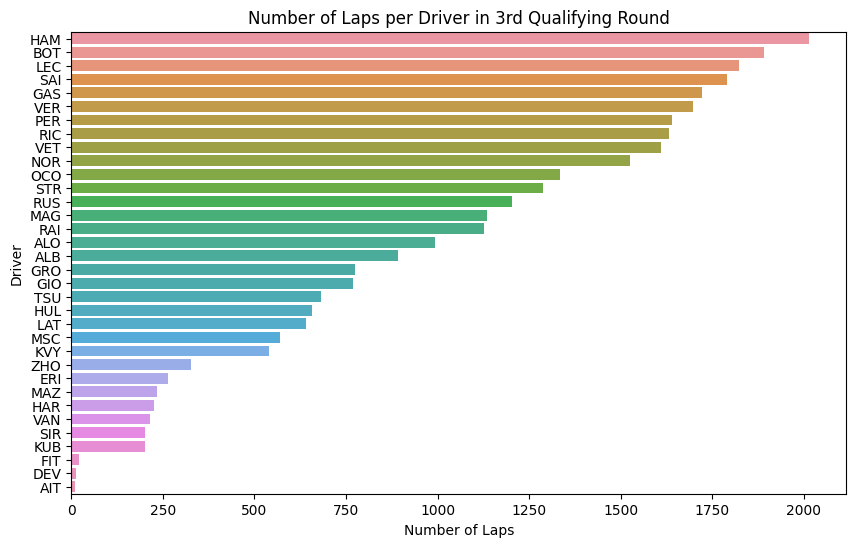

In [4]:
#Number of laps per Driver (Qualifying)
plt.figure(figsize=(10, 6))
sns.countplot(y=qualLaps['Driver'], order=qualLaps['Driver'].value_counts().index)
plt.title('Number of Laps per Driver in 3rd Qualifying Round',color='black')
plt.xlabel('Number of Laps')
plt.style.use('ggplot')

plt.show()

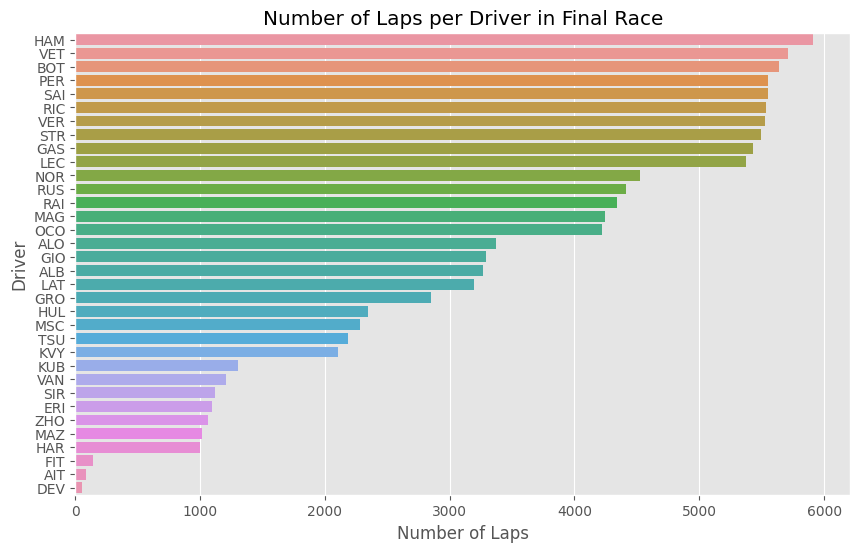

In [5]:
#Number of laps per Driver (Race)
plt.figure(figsize=(10, 6))
sns.countplot(y=raceLaps['Driver'], order=raceLaps['Driver'].value_counts().index)
plt.title('Number of Laps per Driver in Final Race',color='black')
plt.xlabel('Number of Laps')
plt.style.use('ggplot')

plt.show()

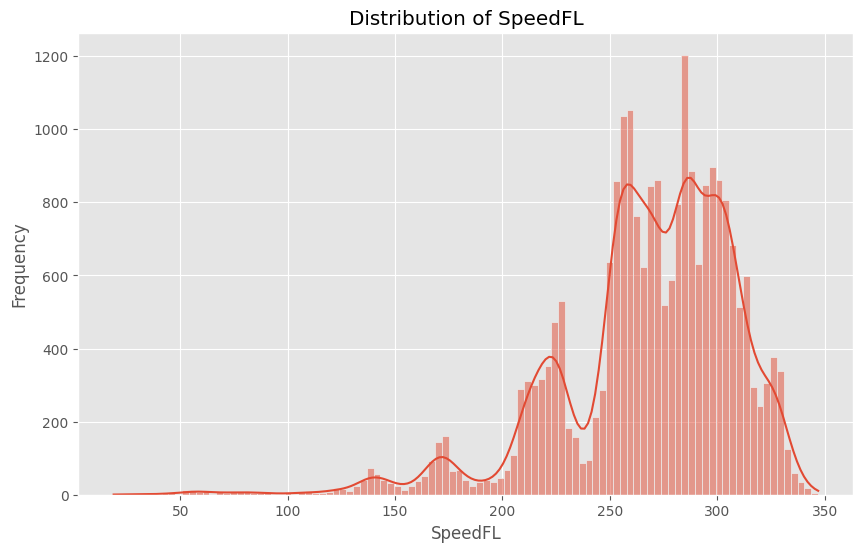

In [6]:
#Distribution of speeds (qualifying) 
# slower speed may indicate track curves
plt.figure(figsize=(10, 6))
sns.histplot(qualLaps['SpeedFL'].dropna(), kde=True)  
plt.title('Distribution of SpeedFL', color='black')
plt.xlabel('SpeedFL')
plt.ylabel('Frequency')
plt.style.use('ggplot')

plt.show()

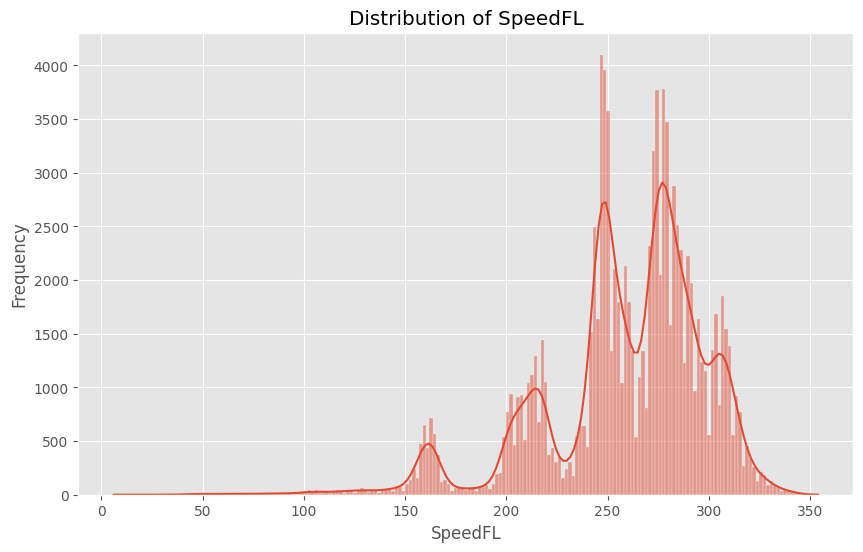

In [7]:
#Distribution of speeds (race)
plt.figure(figsize=(10, 6))
sns.histplot(raceLaps['SpeedFL'].dropna(), kde=True)
plt.title('Distribution of SpeedFL', color='black')
plt.xlabel('SpeedFL')
plt.ylabel('Frequency')
plt.style.use('ggplot')

plt.show()

C:\Users\alec\AppData\Local\Temp\ipykernel_7032\435794377.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Compound', y='SpeedFL', data=qualLaps, ci=None)


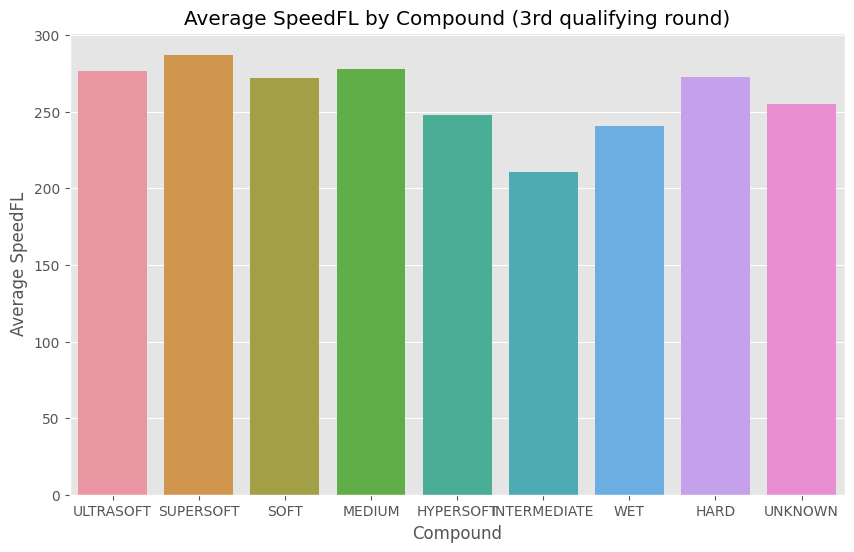

In [8]:
#Average SpeedFL by Compound (qualification)
plt.figure(figsize=(10, 6))
sns.barplot(x='Compound', y='SpeedFL', data=qualLaps, ci=None)
plt.title('Average SpeedFL by Compound (3rd qualifying round)',color='black')
plt.ylabel('Average SpeedFL')
plt.style.use('ggplot')

plt.show()

C:\Users\alec\AppData\Local\Temp\ipykernel_7032\3968635955.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Compound', y='SpeedFL', data=raceLaps, ci=None)


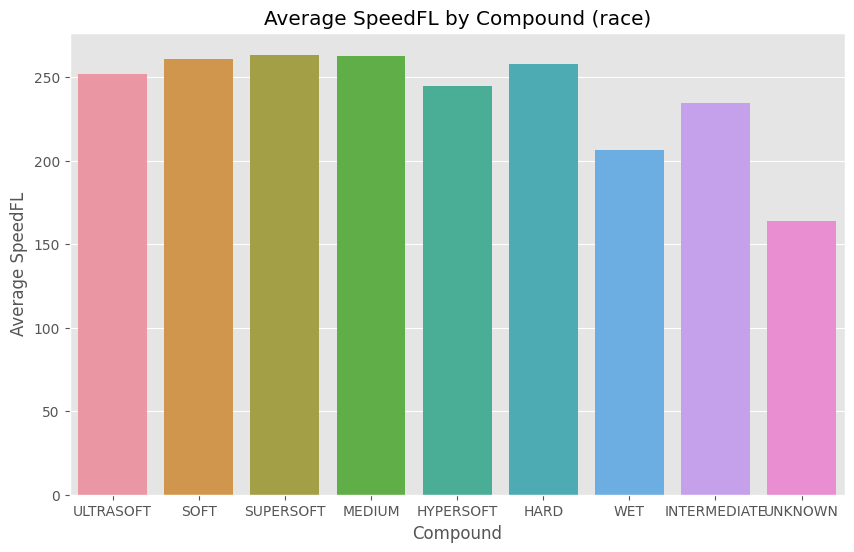

In [9]:
#Average SpeedFL by Compound (race)
plt.figure(figsize=(10, 6))
sns.barplot(x='Compound', y='SpeedFL', data=raceLaps, ci=None)
plt.title('Average SpeedFL by Compound (race)', color='black')
plt.ylabel('Average SpeedFL')
plt.style.use('ggplot')
plt.show()

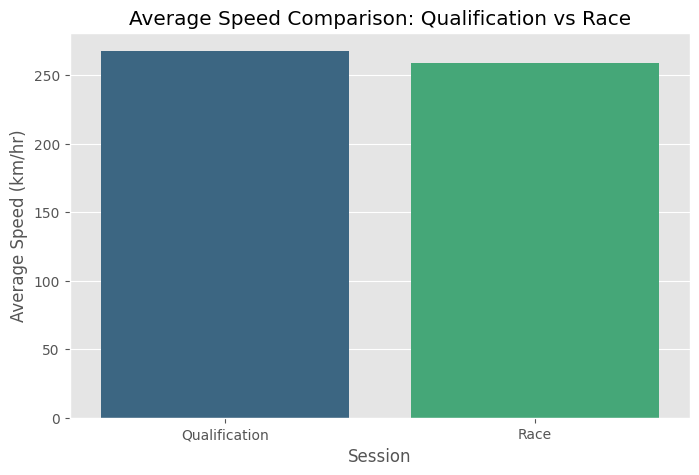

In [10]:
#Average speed comparision 
avg_speed_qualification = qualLaps['SpeedFL'].mean()
avg_speed_race = raceLaps['SpeedFL'].mean()

# Creating the dataframe for plotting
df_avg_speed = pd.DataFrame({
    'Session': ['Qualification', 'Race'],
    'Average Speed': [avg_speed_qualification, avg_speed_race]
})

plt.figure(figsize=(8, 5))
sns.barplot(x='Session', y='Average Speed', data=df_avg_speed, palette='viridis')
plt.title('Average Speed Comparison: Qualification vs Race', color='black')
plt.ylabel('Average Speed (km/hr)')
plt.style.use('ggplot')
plt.show()

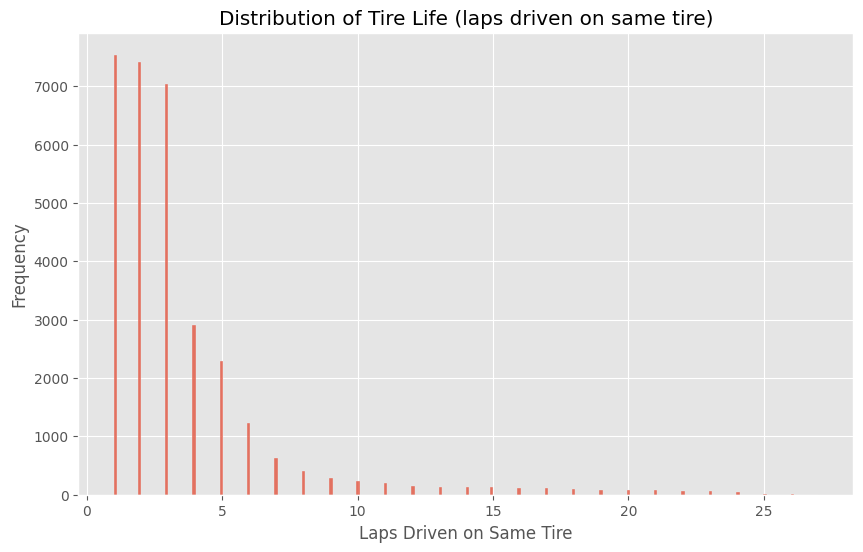

In [11]:
#Distribution of TyreLife
#Tire life is the number of laps a tire has been used continuously 

plt.figure(figsize=(10, 6))
sns.histplot(qualLaps['TyreLife'].dropna(), kde=False)
plt.title('Distribution of Tire Life (laps driven on same tire)', color='black')
plt.xlabel('Laps Driven on Same Tire')
plt.ylabel('Frequency')
plt.style.use('ggplot')

plt.show()


In [12]:
print(qualLaps['Team'].nunique())
print(qualLaps['raceId'].nunique())

16
103


In [13]:
#Total Amount of Pit Stops
# I'm calculating pit stop count using the total number of stints a driver has. 
# Drivers start with 1 stint when they drive out to start the race. max() shows the total stints a driver had in a race
pit_stops = qualLaps.groupby(['Driver', 'raceId'])['Stint'].max().reset_index()
pit_stops['Stint'] = pit_stops['Stint'] - 1 
total_pit_stops = pit_stops['Stint'].sum()

print(f"Total Pit Stops: {total_pit_stops}")

Total Pit Stops: 6440.0


In [14]:
pit_stops.sort_values('Driver', ascending=False)

,Driver,raceId,Stint
2050,ZHO,2022r9q,5.0
2039,ZHO,2022r1q,3.0
2029,ZHO,2022r10q,2.0
2030,ZHO,2022r11q,0.0
2031,ZHO,2022r12q,1.0
...,...,...,...
36,ALB,2020r8q,5.0
35,ALB,2020r7q,4.0
34,ALB,2020r6q,5.0
33,ALB,2020r5q,5.0


C:\Users\alec\AppData\Local\Temp\ipykernel_7032\1679375794.py:7: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Stint', y='Driver', data=avg_pit_stops_by_driver.sort_values('Stint', ascending=False), ci=None)


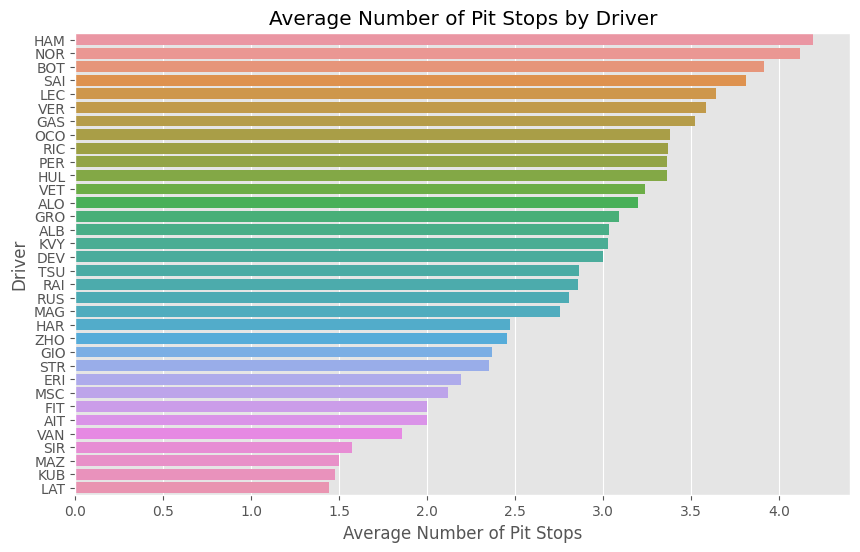

In [15]:
# 2. Average Pit Stops by Drivers

avg_pit_stops_by_driver = pit_stops.groupby('Driver')['Stint'].mean().reset_index()


plt.figure(figsize=(10, 6))
sns.barplot(x='Stint', y='Driver', data=avg_pit_stops_by_driver.sort_values('Stint', ascending=False), ci=None)
plt.title('Average Number of Pit Stops by Driver', color='black')
plt.xlabel('Average Number of Pit Stops')
plt.ylabel('Driver')
plt.style.use('ggplot')

plt.show()

C:\Users\alec\AppData\Local\Temp\ipykernel_7032\2529012312.py:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Stint', y='Team', data=avg_pit_stops_by_team.sort_values('Stint', ascending=False), ci=None)


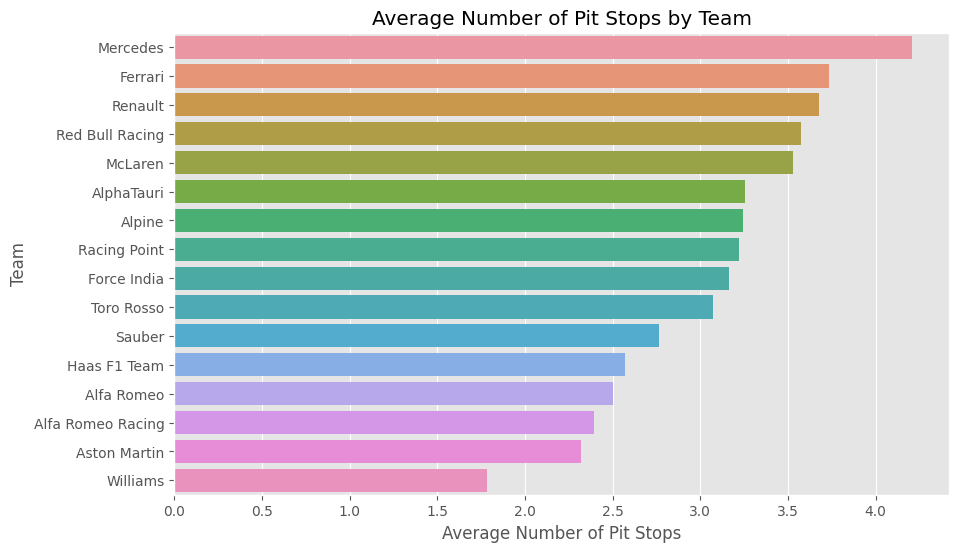

In [16]:
# 3. Average Pit Stops by Teams
pit_stops_with_team = pit_stops.merge(qualLaps[['Driver', 'raceId', 'Team']], on=['Driver', 'raceId'], how='left').drop_duplicates()
avg_pit_stops_by_team = pit_stops_with_team.groupby('Team')['Stint'].mean().reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(x='Stint', y='Team', data=avg_pit_stops_by_team.sort_values('Stint', ascending=False), ci=None)
plt.title('Average Number of Pit Stops by Team',color='black')
plt.xlabel('Average Number of Pit Stops')
plt.ylabel('Team')
plt.style.use('ggplot')

plt.show()

# Qualification and Race Results
> ## **qualResults columns:**
'DriverNumber', 'BroadcastName', 'Abbreviation', 'DriverId', 'TeamName',
       'TeamColor', 'TeamId', 'FirstName', 'LastName', 'FullName',
       'HeadshotUrl', 'CountryCode', 'Position', 'ClassifiedPosition',
       'GridPosition', 'Q1', 'Q2', 'Q3', 'Time', 'Status', 'Points', 'raceId'
> ## **raceResults columns:**
'DriverNumber', 'BroadcastName', 'Abbreviation', 'DriverId', 'TeamName',
       'TeamColor', 'TeamId', 'FirstName', 'LastName', 'FullName',
       'HeadshotUrl', 'CountryCode', 'Position', 'ClassifiedPosition',
       'GridPosition', 'Q1', 'Q2', 'Q3', 'Time', 'Status', 'Points', 'raceId'],
      dtype='object'

In [17]:
qualResults

,DriverNumber,BroadcastName,Abbreviation,DriverId,TeamName,TeamColor,TeamId,FirstName,LastName,FullName,...,Position,ClassifiedPosition,GridPosition,Q1,Q2,Q3,Time,Status,Points,raceId
0,44,L HAMILTON,HAM,hamilton,Mercedes,00D2BE,mercedes,Lewis,Hamilton,Lewis Hamilton,...,1.0,NaN,NaN,0 days 00:01:22.824000,0 days 00:01:22.051000,0 days 00:01:21.164000,NaN,NaN,NaN,2018r1q
1,7,K RAIKKONEN,RAI,raikkonen,Ferrari,DC0000,ferrari,Kimi,Räikkönen,Kimi Räikkönen,...,2.0,NaN,NaN,0 days 00:01:23.096000,0 days 00:01:22.507000,0 days 00:01:21.828000,NaN,NaN,NaN,2018r1q
2,5,S VETTEL,VET,vettel,Ferrari,DC0000,ferrari,Sebastian,Vettel,Sebastian Vettel,...,3.0,NaN,NaN,0 days 00:01:23.348000,0 days 00:01:21.944000,0 days 00:01:21.838000,NaN,NaN,NaN,2018r1q
3,33,M VERSTAPPEN,VER,max_verstappen,Red Bull Racing,1E41FF,red_bull,Max,Verstappen,Max Verstappen,...,4.0,NaN,NaN,0 days 00:01:23.483000,0 days 00:01:22.416000,0 days 00:01:21.879000,NaN,NaN,NaN,2018r1q
4,3,D RICCIARDO,RIC,ricciardo,Red Bull Racing,1E41FF,red_bull,Daniel,Ricciardo,Daniel Ricciardo,...,5.0,NaN,NaN,0 days 00:01:23.494000,0 days 00:01:22.897000,0 days 00:01:22.152000,NaN,NaN,NaN,2018r1q
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2055,20,K MAGNUSSEN,MAG,NaN,Haas F1 Team,b6babd,NaN,Kevin,Magnussen,Kevin Magnussen,...,16.0,NaN,NaN,0 days 00:01:25.834000,NaN,NaN,NaN,NaN,NaN,2022r22q
2056,10,P GASLY,GAS,NaN,AlphaTauri,4e7c9b,NaN,Pierre,Gasly,Pierre Gasly,...,17.0,NaN,NaN,0 days 00:01:25.859000,NaN,NaN,NaN,NaN,NaN,2022r22q
2057,77,V BOTTAS,BOT,NaN,Alfa Romeo,b12039,NaN,Valtteri,Bottas,Valtteri Bottas,...,18.0,NaN,NaN,0 days 00:01:25.892000,NaN,NaN,NaN,NaN,NaN,2022r22q
2058,23,A ALBON,ALB,NaN,Williams,37bedd,NaN,Alexander,Albon,Alexander Albon,...,19.0,NaN,NaN,0 days 00:01:26.028000,NaN,NaN,NaN,NaN,NaN,2022r22q


In [18]:
raceResults

,DriverNumber,BroadcastName,Abbreviation,DriverId,TeamName,TeamColor,TeamId,FirstName,LastName,FullName,...,Position,ClassifiedPosition,GridPosition,Q1,Q2,Q3,Time,Status,Points,raceId
0,5,S VETTEL,VET,vettel,Ferrari,DC0000,ferrari,Sebastian,Vettel,Sebastian Vettel,...,1.0,1,3.0,NaN,NaN,NaN,0 days 01:29:33.283000,Finished,25.0,2018r1r
1,44,L HAMILTON,HAM,hamilton,Mercedes,00D2BE,mercedes,Lewis,Hamilton,Lewis Hamilton,...,2.0,2,1.0,NaN,NaN,NaN,0 days 00:00:05.036000,Finished,18.0,2018r1r
2,7,K RAIKKONEN,RAI,raikkonen,Ferrari,DC0000,ferrari,Kimi,Räikkönen,Kimi Räikkönen,...,3.0,3,2.0,NaN,NaN,NaN,0 days 00:00:06.309000,Finished,15.0,2018r1r
3,3,D RICCIARDO,RIC,ricciardo,Red Bull Racing,1E41FF,red_bull,Daniel,Ricciardo,Daniel Ricciardo,...,4.0,4,8.0,NaN,NaN,NaN,0 days 00:00:07.069000,Finished,12.0,2018r1r
4,14,F ALONSO,ALO,alonso,McLaren,FF8700,mclaren,Fernando,Alonso,Fernando Alonso,...,5.0,5,10.0,NaN,NaN,NaN,0 days 00:00:27.886000,Finished,10.0,2018r1r
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2055,20,K MAGNUSSEN,MAG,NaN,Haas F1 Team,b6babd,NaN,Kevin,Magnussen,Kevin Magnussen,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022r22r
2056,10,P GASLY,GAS,NaN,AlphaTauri,4e7c9b,NaN,Pierre,Gasly,Pierre Gasly,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022r22r
2057,77,V BOTTAS,BOT,NaN,Alfa Romeo,b12039,NaN,Valtteri,Bottas,Valtteri Bottas,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022r22r
2058,23,A ALBON,ALB,NaN,Williams,37bedd,NaN,Alexander,Albon,Alexander Albon,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022r22r


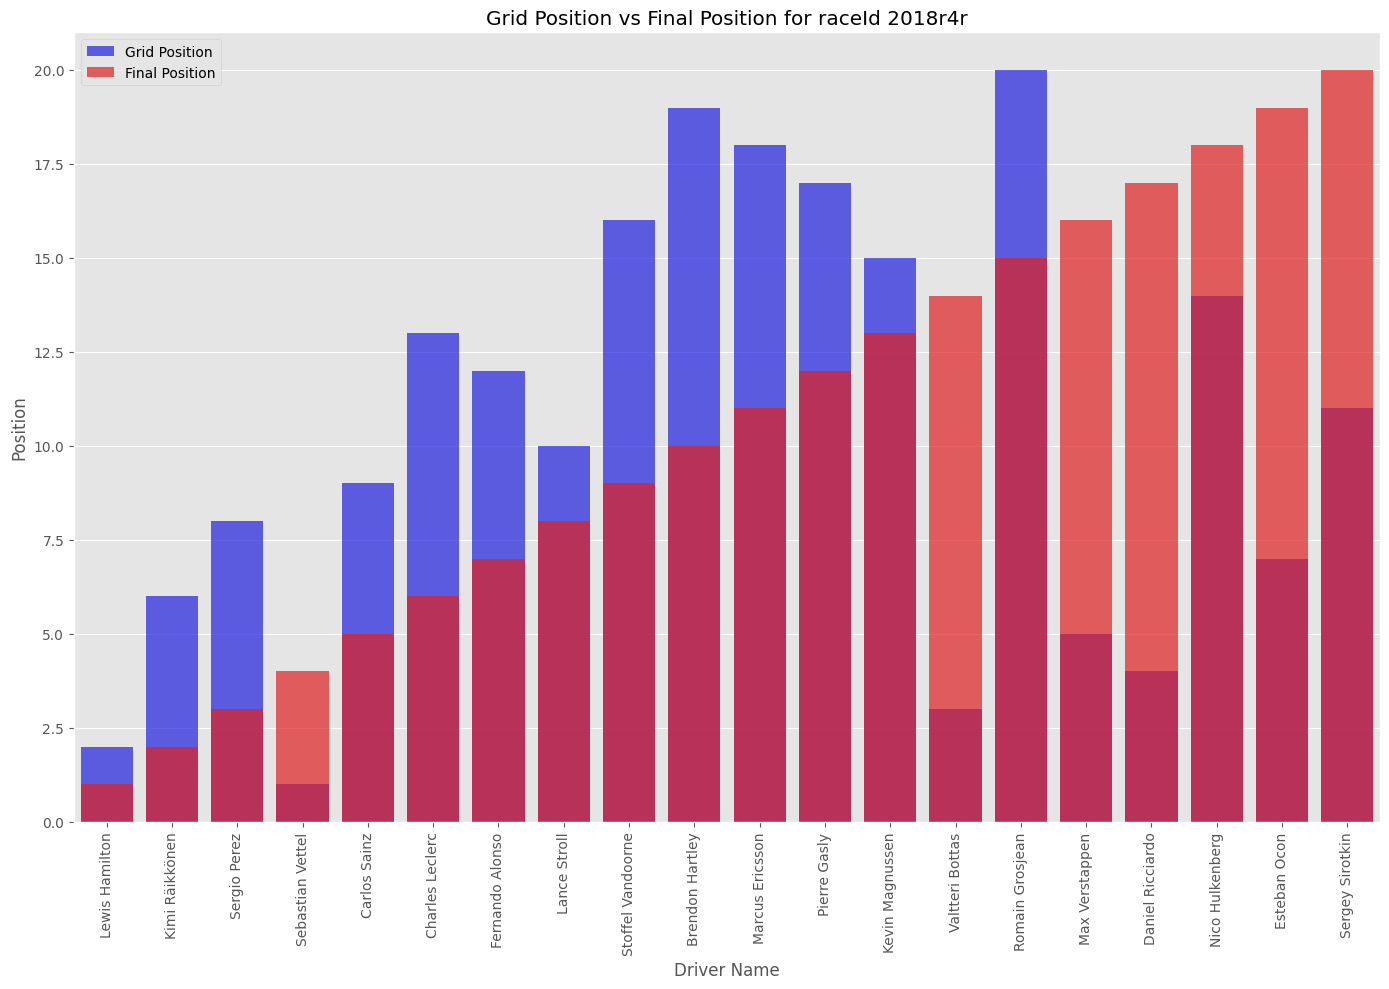

In [19]:
#final position under grid position = overperformance comapred to grid position

race = '2018r4r'
race_data = raceResults[raceResults['raceId'] == race]
race_data = race_data.sort_values(by='Position')

plt.figure(figsize=(14, 10))
sns.barplot(x='FullName', y='GridPosition', data=race_data, color='blue', label='Grid Position', alpha=0.7, order=race_data['FullName'], ax=plt.gca())

sns.barplot(x='FullName', y='Position', data=race_data, color='red', label='Final Position', alpha=0.7, order=race_data['FullName'], ax=plt.gca())
plt.title(f'Grid Position vs Final Position for raceId {race}', color='black')
plt.ylabel('Position')
plt.xlabel('Driver Name')
plt.xticks(rotation=90) 
plt.legend()
plt.tight_layout()
plt.style.use('ggplot')

plt.show()


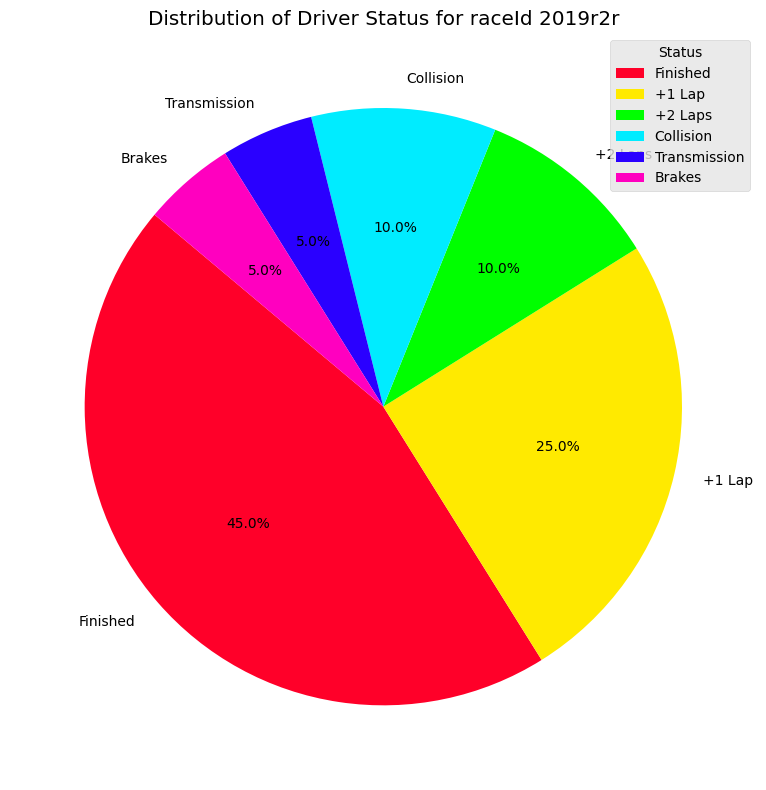

In [20]:
#Driver status for a specific race

race_data = raceResults[raceResults['raceId'] == '2019r4r']
status_counts = race_data['Status'].value_counts()

plt.figure(figsize=(10, 8))
colors = plt.cm.gist_rainbow(np.linspace(0, 1, len(status_counts)))  # Assigns different colors

status_counts.plot.pie(colors=colors, autopct=lambda p: '{:.1f}%'.format(p), startangle=140)
plt.title('Distribution of Driver Status for raceId 2019r2r', color='black')
legend = plt.legend(title="Status", loc="best", frameon=True)
plt.setp(legend.get_texts(), color='black')
plt.setp(legend.get_title(), color='black')
plt.ylabel('') 
plt.tight_layout()

plt.style.use('ggplot')
for text in plt.gca().texts:
    text.set_color("black")

plt.show()


# Qualifying and Race Weather

In [21]:
# Qualifying Weather 

qualWeatherGrouped = qualWeather.groupby('raceId').mean().reset_index()
raceWeatherGrouped = raceWeather.groupby('raceId').mean().reset_index()


print(qualWeatherGrouped.head(5))
print(raceWeatherGrouped.head(5))


     raceId    AirTemp   Humidity     Pressure  Rainfall  TrackTemp  \
0  2018r10q  26.464384  37.406849  1006.378082  0.000000  52.447945   
1  2018r11q  23.110526  70.727632  1000.365789  0.000000  37.889474   
2  2018r12q  23.654412  77.967647   982.533824  0.867647  30.348529   
3  2018r13q  14.608861  56.378481   964.562025  0.151899  25.982278   
4  2018r14q  20.149367  66.713924   993.900000  0.164557  29.644304   

   WindDirection  WindSpeed  
0     200.931507   1.550685  
1     124.289474   1.192105  
2     196.632353   1.269118  
3     170.822785   1.789873  
4     116.417722   1.294937  
     raceId    AirTemp   Humidity     Pressure  Rainfall  TrackTemp  \
0  2018r10r  27.431633  38.739796  1008.304082  0.000000  52.169388   
1  2018r11r  26.401923  54.807692  1001.400000  0.259615  40.668269   
2  2018r12r  33.758879  33.006542   983.527103  0.000000  51.089720   
3  2018r13r  17.327358  37.700943   966.910377  0.000000  27.898113   
4  2018r14r  22.189899  63.807071   99

C:\Users\alec\AppData\Local\Temp\ipykernel_7032\1059305306.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  qualWeatherGrouped = qualWeather.groupby('raceId').mean().reset_index()
C:\Users\alec\AppData\Local\Temp\ipykernel_7032\1059305306.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  raceWeatherGrouped = raceWeather.groupby('raceId').mean().reset_index()


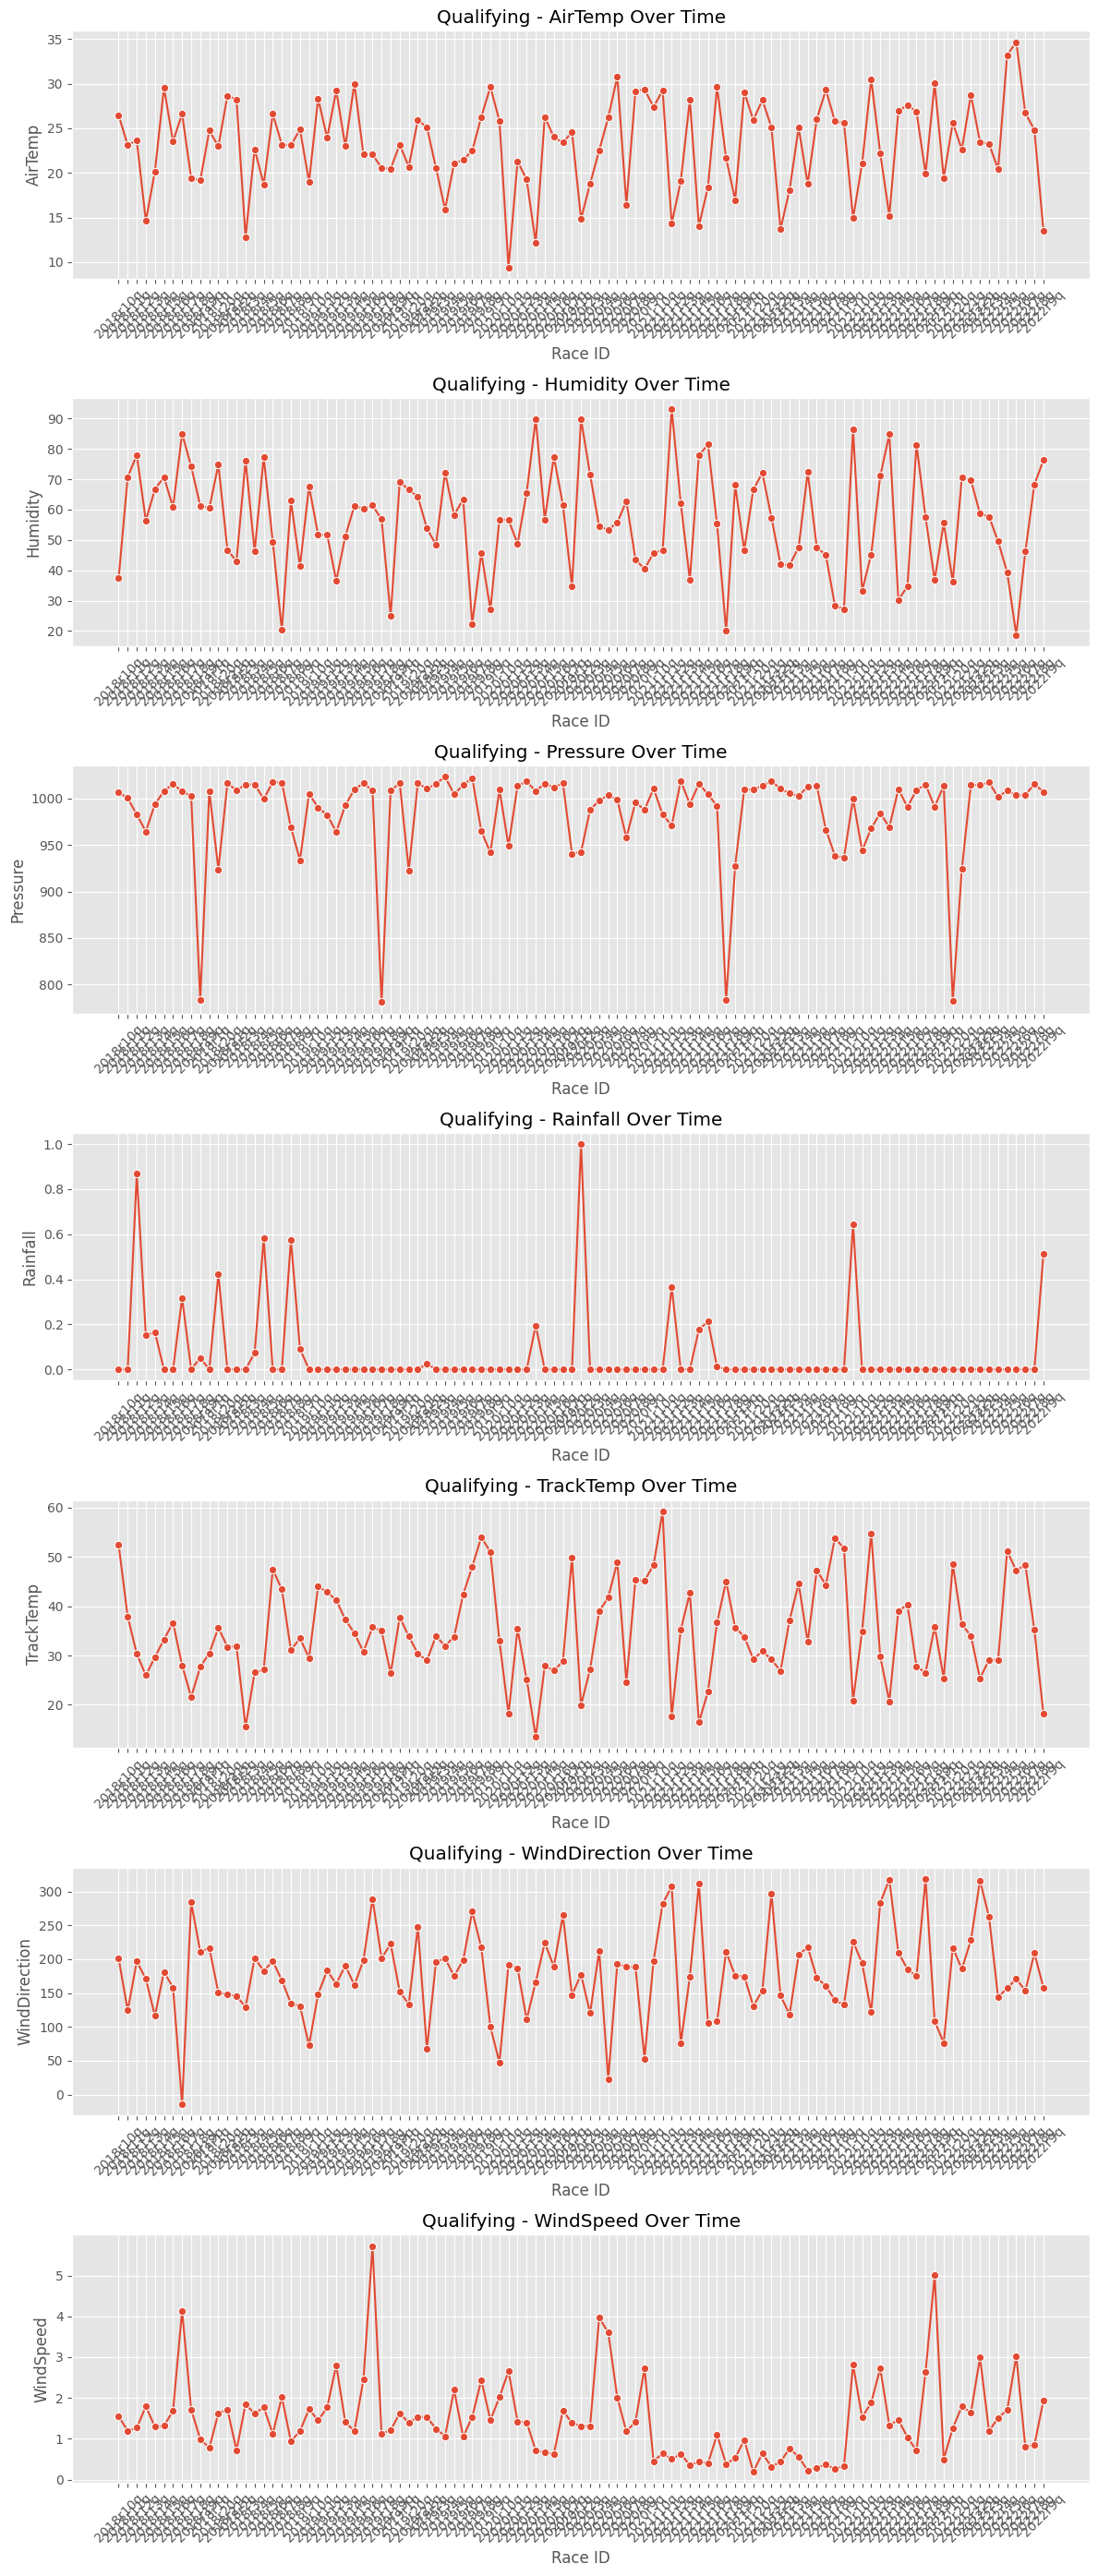

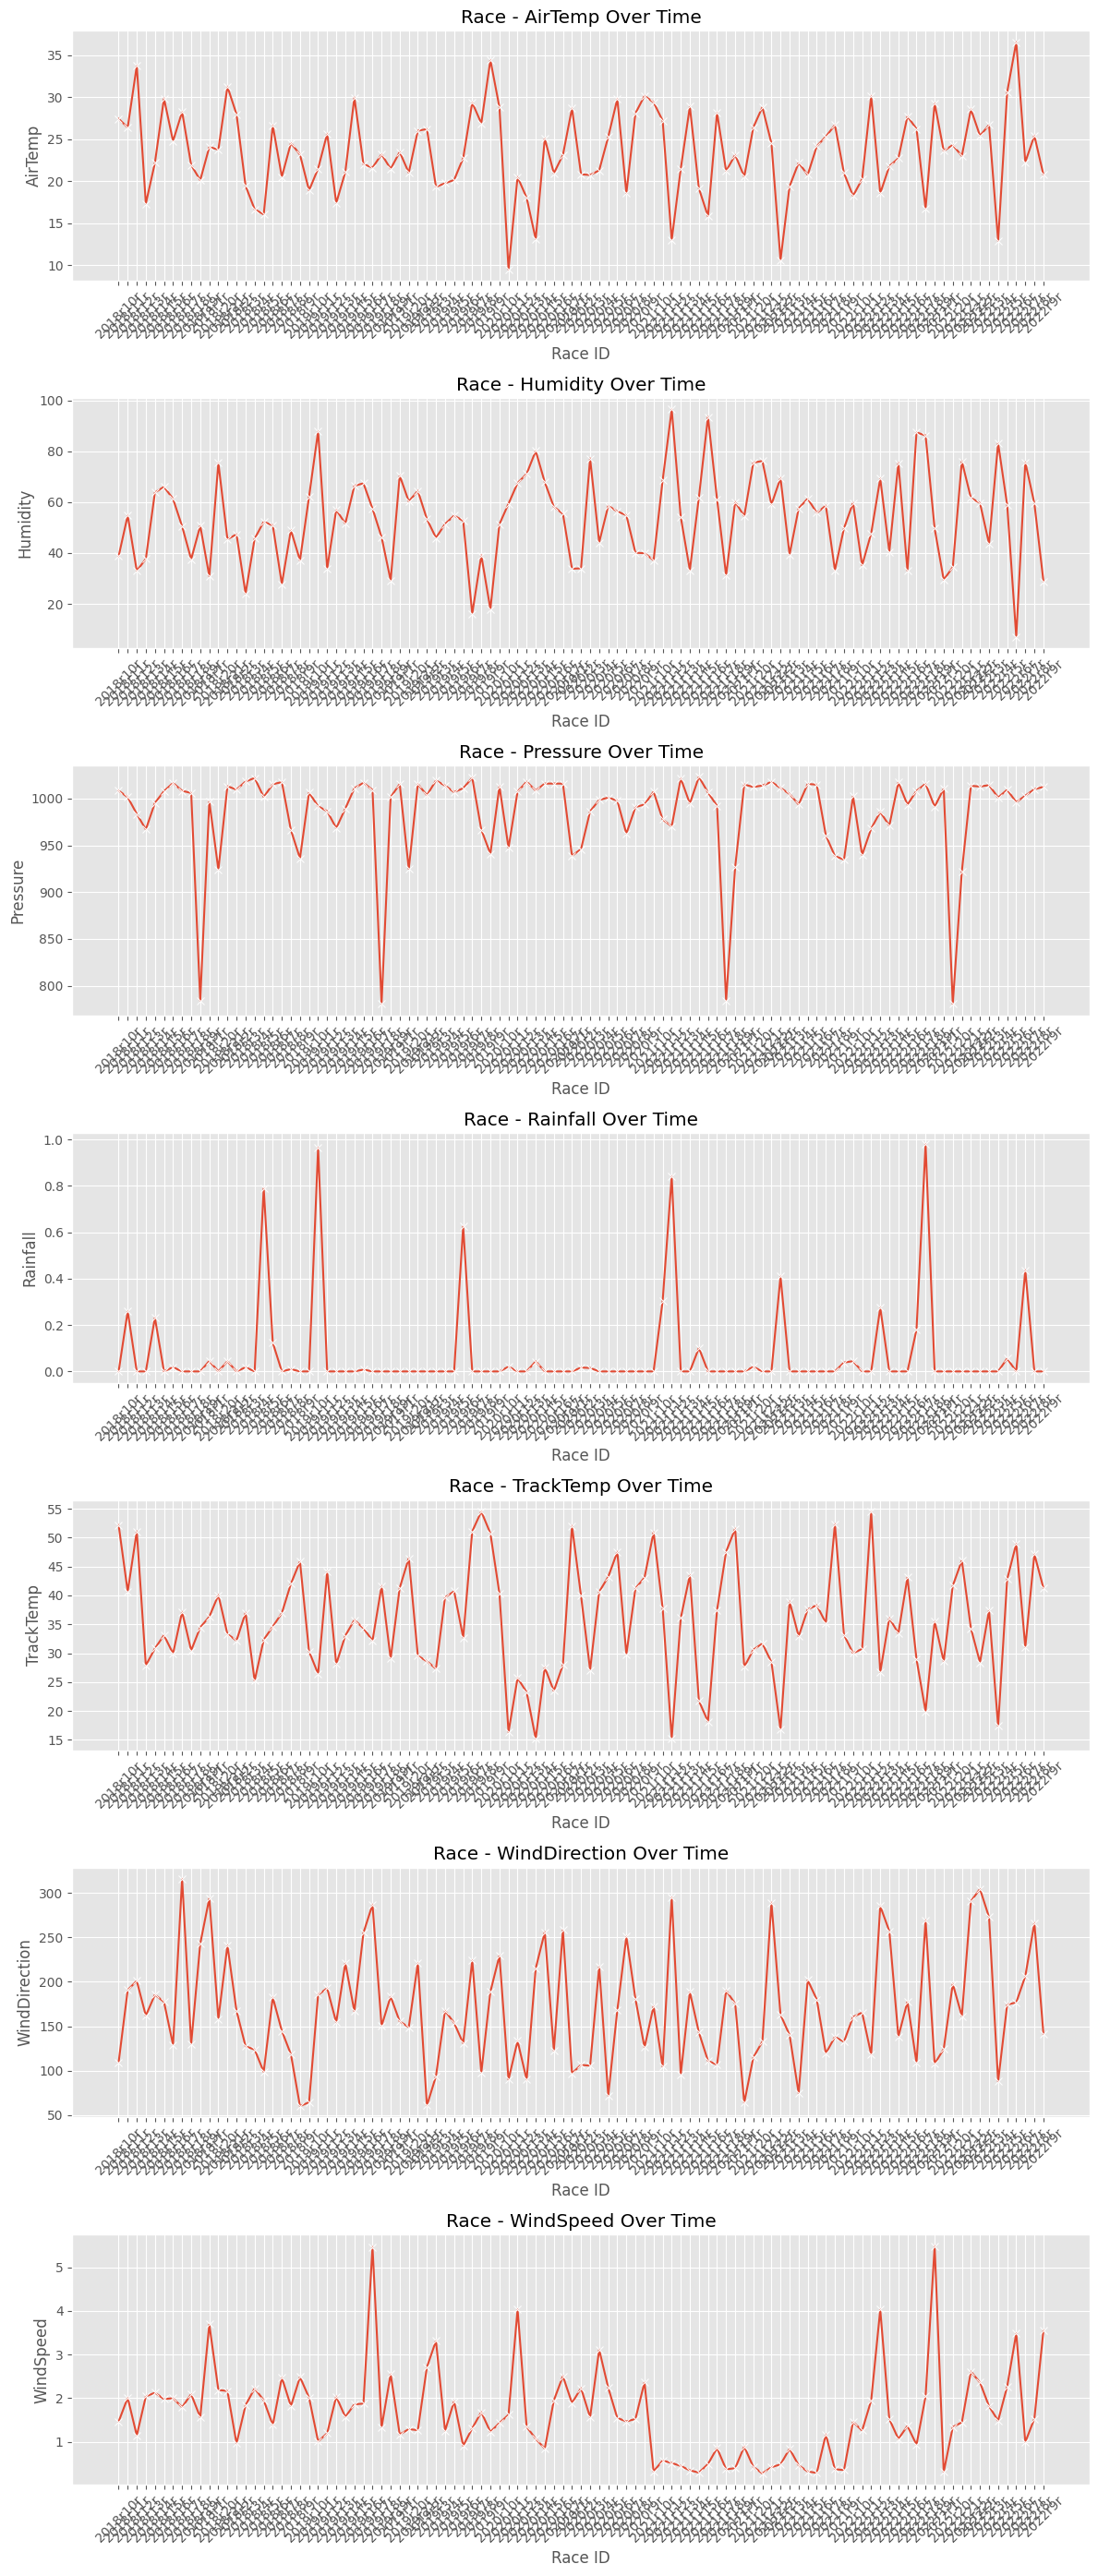

In [29]:
# Weather metrics over time (using raceId as timestamp)

weather_metrics = ['AirTemp', 'Humidity', 'Pressure', 'Rainfall', 'TrackTemp', 'WindDirection', 'WindSpeed']

num_metrics = len(weather_metrics)

fig_qual, axes_qual = plt.subplots(nrows=num_metrics, ncols=1, figsize=(12, 4 * num_metrics))

for idx, metric in enumerate(weather_metrics):
    sns.lineplot(x='raceId', y=metric, data=qualWeatherGrouped, ax=axes_qual[idx], marker='o')
    
    axes_qual[idx].set_title(f'Qualifying - {metric} Over Time')
    axes_qual[idx].set_xlabel('Race ID')
    axes_qual[idx].set_ylabel(metric)
    axes_qual[idx].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

# Create subplots for races
fig_race, axes_race = plt.subplots(nrows=num_metrics, ncols=1, figsize=(12, 4 * num_metrics))

for idx, metric in enumerate(weather_metrics):
    sns.lineplot(x='raceId', y=metric, data=raceWeatherGrouped, ax=axes_race[idx], marker='x')
    
    axes_race[idx].set_title(f'Race - {metric} Over Time')
    axes_race[idx].set_xlabel('Race ID')
    axes_race[idx].set_ylabel(metric)
    axes_race[idx].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

# **Merging Dataframes**

>## qualMerged_df
>## raceMerged_df

### Merging 3rd Qualifying Round Tables

In [22]:
qualMerged_df = pd.merge(qualLaps, qualResults, on=['raceId', 'DriverNumber'], how='left', suffixes=('', '_results'))

# Merge with qualStatus
qualMerged_df = pd.merge(qualMerged_df, qualStatus, on=['raceId'], how='left', suffixes=('', '_status'))

# Merge with qualTrackStatus
qualMerged_df = pd.merge(qualMerged_df, qualTrackStatus, on=['raceId'], how='left', suffixes=('', '_trackstatus'))

# Merge with qualWeatherGrouped
qualMerged_df = pd.merge(qualMerged_df, qualWeatherGrouped, on=['raceId'], how='left', suffixes=('', '_weather'))

qualMerged_df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 2559891 entries, 0 to 2559890
Data columns (total 64 columns):
 #   Column              Dtype  
---  ------              -----  
 0   Time                object 
 1   Driver              object 
 2   DriverNumber        int64  
 3   LapTime             object 
 4   LapNumber           float64
 5   Stint               float64
 6   PitOutTime          object 
 7   PitInTime           object 
 8   Sector1Time         object 
 9   Sector2Time         object 
 10  Sector3Time         object 
 11  Sector1SessionTime  object 
 12  Sector2SessionTime  object 
 13  Sector3SessionTime  object 
 14  SpeedI1             float64
 15  SpeedI2             float64
 16  SpeedFL             float64
 17  SpeedST             float64
 18  IsPersonalBest      object 
 19  Compound            object 
 20  TyreLife            float64
 21  FreshTyre           bool   
 22  Team                object 
 23  LapStartTime        object 
 24  LapStartDate        obje

### Merging Final Race Tables

In [23]:
raceMerged_df = pd.merge(raceLaps, raceResults, on=['raceId', 'DriverNumber'], how='left', suffixes=('', '_results'))

# Merge with raceStatus
raceMerged_df = pd.merge(raceMerged_df, raceStatus, on=['raceId'], how='left', suffixes=('', '_status'))

# Merge with raceTrackStatus
raceMerged_df = pd.merge(raceMerged_df, raceTrackStatus, on=['raceId'], how='left', suffixes=('', '_trackstatus'))

# Merge with raceWeather
raceMerged_df = pd.merge(raceMerged_df, raceWeatherGrouped, on=['raceId'], how='left', suffixes=('', '_weather'))


# Podium Finishes

### Creating Podium Feature (Top 3 in Final Race)

In [24]:
raceMerged_df['Podium'] = raceMerged_df['Position_results'].apply(lambda x: 1 if x in [1, 2, 3] else 0)

In [25]:
podium_df = raceMerged_df[raceMerged_df['Position_results'].isin([1, 2, 3])]
podium_df = podium_df.drop_duplicates(subset=['DriverNumber', 'raceId'])

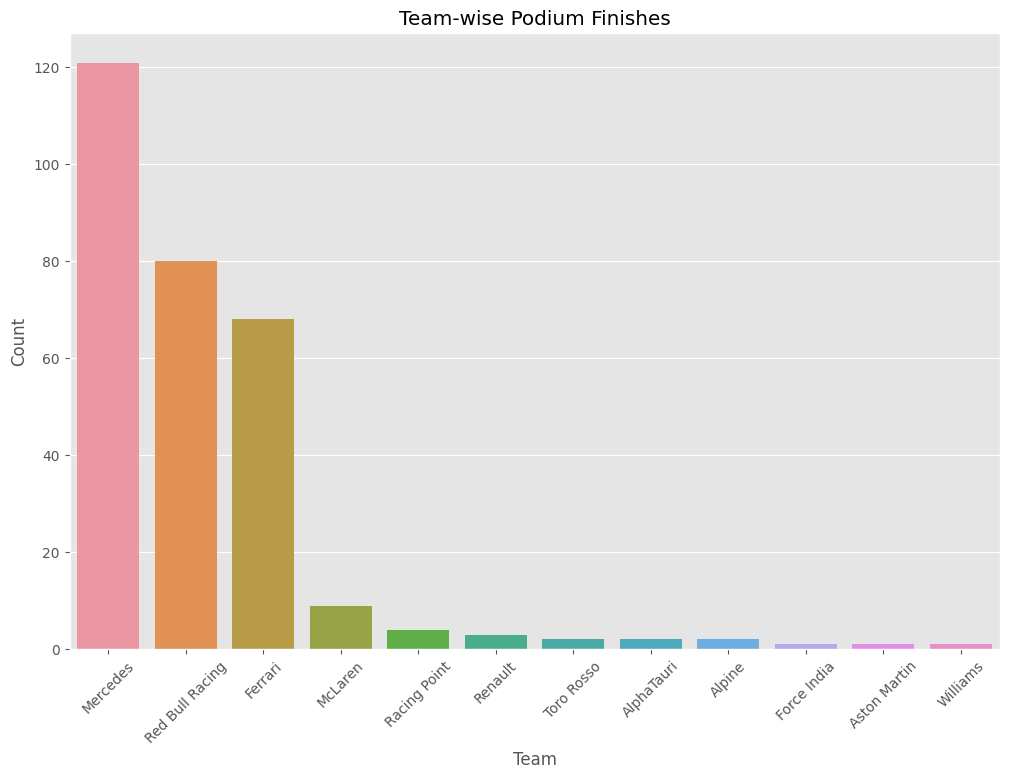

In [26]:
# Team-wise Podium Finishes
#need to validate if this is correct

order = podium_df['Team'].value_counts().index

plt.figure(figsize=(12, 8))
sns.countplot(data=podium_df, x='Team', order=order)
plt.title('Team-wise Podium Finishes')
plt.xlabel('Team')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

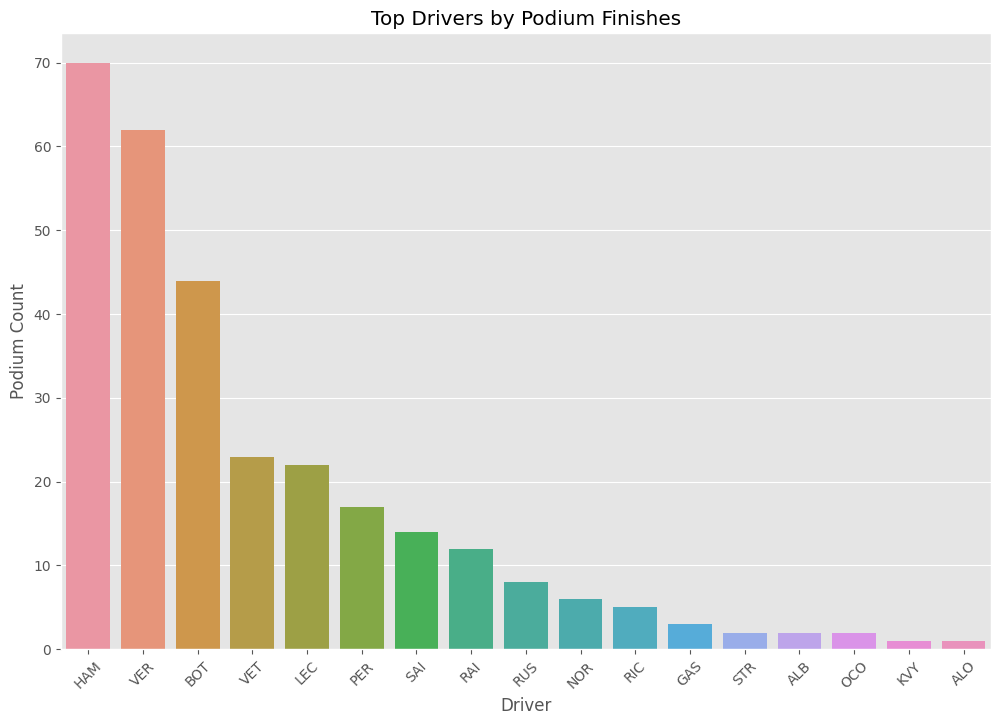

In [27]:
# Number of Podium Finishes by Driver
driver_podium_counts = podium_df['Driver'].value_counts().reset_index()
driver_podium_counts.columns = ['Driver', 'PodiumCount']

top_drivers = driver_podium_counts.sort_values(by='PodiumCount', ascending=False).head(20)

plt.figure(figsize=(12, 8))
sns.barplot(data=top_drivers, x='Driver', y='PodiumCount')
plt.title('Top Drivers by Podium Finishes')
plt.xlabel('Driver')
plt.ylabel('Podium Count')
plt.xticks(rotation=45)
plt.show()
